## Studying the binary system of Neutron Star

In [ ]:
#conda install -c conda-forge python-ldas-tools-framecpp ldas-tools-framecpp

In [ ]:
#!pip install -r requirements

In [89]:
from gwosc.datasets  import event_gps
from gwosc.locate import get_event_urls
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import os

In [90]:
import os
print(os.getcwd())

/media/user/Gravitationa--Wave


In [99]:
# load data
filename = './data/H-H1_GWOSC_16KHZ_R1-1187008867-32.gwf'

# Read strain data
strain = TimeSeries.read(filename, channel= 'H1:GWOSC-16KHZ_R1_STRAIN')

# Plot
#strain.plot()


In [ ]:
#print(get_channel_names('G-G1_GWOSC_16KHZ_R1-1187008867-32.gwf'))

In [100]:
strain_w = strain.whiten()

# whiten plot
#strain_w.plot()

In [101]:
# Whiten the data
strain_whitened = strain.whiten()

# Bandpass filter: remove low-frequency seismic and high-frequency noise
strain_filtered = strain_whitened.highpass(30).lowpass(500)

# Plot filtered 
#strain_filtered.plot()

In [ ]:
print(your_model_waveform[:10])
print(np.max(np.abs(your_model_waveform)))

strain_zoom.plot()

/tmp/ipykernel_14999/1007193561.py:15: RuntimeWarning: divide by zero encountered in power
  amp = tau**(-1 / 4)


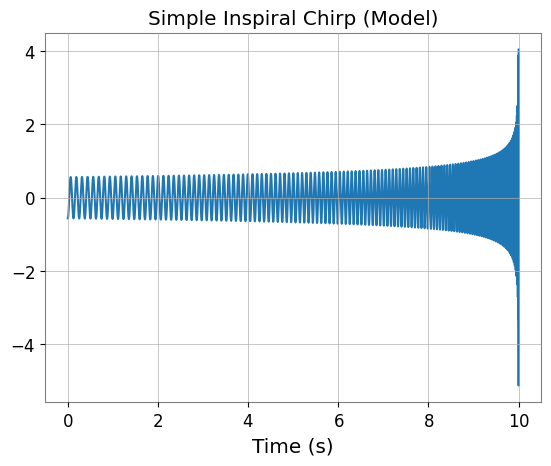

In [97]:
def simple_chirp(t, M_chirp, f0= 30):
    
    # chirp waveform using leading-order inspiral
    G = 6.67430e-11
    c = 3e8
    Msun = 1.98847e30
    M_chirp_kg = M_chirp * Msun
    
    # time
    tc = 10                # s
    tau = tc - t
    
    # f(t) from 0PN: f(t) = (5/(256*pi^8/3)) * 1/(M_chirp * G)^5/3 * tau^-3/8
    amp = tau**(-1 / 4)
    phase = tau**(5 / 8)
    
    return amp * np.cos(phase * 2 * np.pi * f0)

# Generate
fs = 4096
t = np.linspace(0, 10, 10 * fs)
wave = simple_chirp(t, M_chirp= 1.2)  # chirp mass ~ 1.2 solar masses

plt.plot(t, wave)
plt.xlabel('Time (s)')
plt.title('Simple Inspiral Chirp (Model)')

plt.show()

/tmp/ipykernel_14999/3911219669.py:15: RuntimeWarning: divide by zero encountered in power
  amp = tau**(-1 / 4)


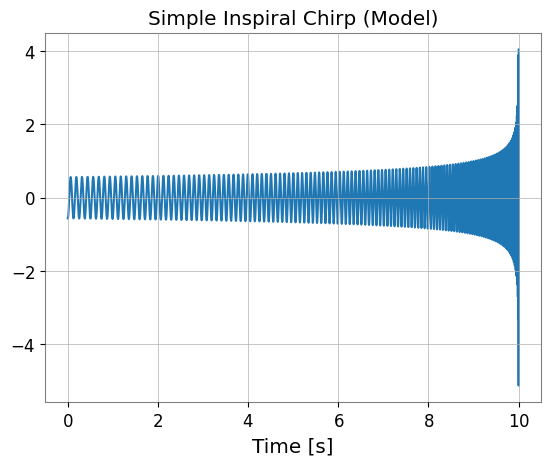

In [85]:
fs = 4096
t = np.linspace(0, 10, 10*fs)
wave = simple_chirp(t, M_chirp=1.2)

plt.plot(t, wave)
plt.xlabel('Time [s]')
plt.title('Simple Inspiral Chirp (Model)')
plt.show()


### TOV

### The theory

In [ ]:
'''def tov_rhs(r, y):
    P, m = y
    rho = eos_inverse(P)
    dPdr =                                     # TOV
    dmdr = 4 * np.pi * r**2 * rho
    return [dPdr, dmdr]

# initial values
r0 = 1e-6                      # Start near zero, not at zero
P0 = 
y0 = [P0, 0]


# Integrate until P ~ 0
sol = odeint(tov_rhs, [r0, r_max], y0, ...)'''

In [ ]:
#####

In [ ]:
# Constants (SI)                 
K     = 1e-2         
gamma = 2.0

# Constants
G = 6.67430e-11
c = 2.99792458e8
M_sun = 1.98847e30
km = 1e3


# Work in geometrized units:  G = c = 1
# conversion: 1 meter   -> 1 meter / (G/c^2)
G_over_c2 = G / c**2                       
meter_to_geom = 1.0 / G_over_c2          
kg_to_geom = 1.0            

# Polytropic EOS parameters 
K =  1e-1
gamma = 2.0

In [ ]:
####

In [ ]:

def eos_pressure(rho):
    return K * rho**gamma

def eos_rho_from_P(P):
    return (P / K) ** (1.0 / gamma)

def tov_rhs(r, y):
    P, m = y
    if P <= 0:
        return [0, 0]
    rho = eos_rho_from_P(P)
    dPdr = - (rho * c**2 + P) * (G * m + 4 * np.pi * G * P * r**3 / c**2) / (r * (r - 2 * G * m / c**2))
    dmdr = 4 * np.pi * r**2 * rho
    return [dPdr, dmdr]

def integrate_star(rho_c):
    P0 = eos_pressure(rho_c)
    y0 = [P0, 0.0]
    r0 = 1.0                  # start at 1 m to avoid singularity
    r_max = 2e6                # integrate up to 2000 km
    
    sol = solve_ivp(tov_rhs, (r0, r_max), y0, max_step= 100.0, dense_output= True, events= lambda r, y: y[0])
    R = sol.t_events[0][0] if sol.t_events[0].size>0 else sol.t[-1]
    M = sol.y[1][-1]
    return R, M

In [ ]:
####

In [ ]:
central_rhos = np.logspace(17, 18.5, 20)  # kg m^-3
R_list= []; M_list= []

for rho_c in central_rhos:
    R, M = integrate_star(rho_c)
    R_km = R / km
    M_sun = M / Msun
    R_list.append(R_km)
    M_list.append(M_sun)

In [ ]:
####

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(M_list, R_list, marker='o')
plt.xlabel("Radius (km)")
plt.ylabel("Mass (solar mass)")
plt.title("Mass–Radius curve (polytropic γ=2)")
plt.grid(True)
plt.show()